### 问题五 磁性元件的最优化条件
#### 在磁性元件的设计与优化领域内，磁芯损耗固然是一个不容忽视的核心评价指标，但在工程实践中，为了实现磁性元件整体性能的卓越与最优化，需要综合考虑多个评价指标，其中，传输磁能就是重要的评价指标之一，因此，同时考虑磁芯损耗与传输磁能这二个评价指标，对于指导磁性元件的设计方向、优化其性能表现，具有重要的理论及实践意义。
#### 请以问题四构建的磁芯损耗预测模型为目标函数，同时考虑传输磁能这个重要指标（由于传输磁能概念的复杂性，我们仅以频率与磁通密度峰值的乘积来衡量传输磁能大小），利用附件一中的实验数据，建立优化模型，分析在什么条件下（温度、频率、波形、磁通密度峰值及磁芯材料），能达到最小的磁芯损耗以及具有最大的传输磁能（即达到最大）？

#### 我们利用问题4得到的各方程的相应参数进行分析

In [1]:
import pandas as pd
df = pd.read_excel('..\C-4\不同材料不同波形的损耗分离模型和修正方程模型拟合结果.xlsx')
df

,a1,a2,a3,a4,b1,b2,b3,b4,励磁波形,材料,损耗分离模型,修正斯坦麦茨方程损失,a,b
0,7.368319,1.466914,2.451521,-1.510661,-1.942393,0.403880,-0.000167,0.236558,正弦波,材料1,5.204378e+12,1.447990e+11,0.997266,0.003117
1,21.557761,1.268478,2.000000,-0.956599,-1.930695,0.483383,-0.000224,0.302264,三角波,材料1,2.124422e+13,9.638618e+12,0.890160,0.114683
2,76.009672,1.024308,2.000000,0.002735,-1.944298,0.423720,0.000231,0.108911,梯形波,材料1,7.940084e+12,1.073719e+13,0.651480,0.479218
3,5.992774,1.489006,2.347763,-1.504196,-1.940548,0.414445,-0.000536,0.445768,正弦波,材料2,4.189431e+12,2.336712e+11,0.999494,0.000575
4,3.729907,1.427762,2.045040,-0.986509,-12.174097,0.694673,-0.000803,1.314508,三角波,材料2,2.599980e+13,8.879885e+12,0.977076,0.024117
5,1.061344,1.560103,2.258292,-0.960703,-1.959521,0.305084,-0.000050,0.308080,梯形波,材料2,1.928162e+13,1.460342e+12,0.977518,0.024226
6,24.969329,1.166863,2.033550,-0.079343,-10.591865,0.674654,-0.001735,2.146836,正弦波,材料3,4.737865e+12,1.546632e+12,0.990352,0.005350
7,7.371657,1.379861,2.128064,-0.865984,-1.949193,0.307835,-0.000391,0.576551,三角波,材料3,3.800302e+13,9.251302e+12,0.990241,0.010556
8,3.702547,1.462163,2.279018,-0.884171,-1.966771,0.242819,-0.000179,0.497220,梯形波,材料3,4.303256e+13,1.943241e+12,0.984186,0.017491
9,12.744122,1.488247,2.486573,-1.674659,-1.942312,0.494315,-0.000757,0.444786,正弦波,材料4,5.761675e+11,4.424592e+10,0.991573,0.009404


### $P_{总损耗}$=$\alpha  P_{修正斯坦麦茨方程}+\beta P_{损耗分离模型}$

#### 修正的斯坦麦茨方程$P_{修正斯坦麦茨方程}=a1•f^{a2}•B_m^{a3}•log(T)^{a4}$

#### 损耗分离模型$P_{损耗分离模型}=P_{h}+P_{cl}+P_{e} .$
* $P_h=b1•f•B_m^{b2} $
* $P_{cl}=b3•f^2•B_m^2$
* $P_e=8•\sqrt{\sigma\cdot S\cdot G\cdot V_0}•f^{1.5}•B_m^{1.5}$

#### 在不同的材料不同的波形情况下，我们可以得到不同参数的总方程，同学们可以基于得到的总方程进行公式推导，这里一共总共是3个自变量* * 包括频率、磁通密度峰值、温度
#### 同学们可以根据不同系数条件下，对这三个变量求偏导，令偏导＝0，得到最优条件

#### 在这里我们考虑，利用遗传算法进行最优条件选择

In [2]:
def ensemble(x):
    return a*steinmetz_eq_adjust(x) + b*separate(x)

def separate(x):
    return b1*x[0]*x[1]**b2+b3*x[0]**2*x[1]**2+(b4*0.1356)**0.5*x[0]**1.5*x[1]**1.5

def steinmetz_eq_adjust(x):
    return a1 * x[0]**a2 * x[1]**a3 * np.log(x[2])**a4

Iteration 1/20, Best Position: [4.29814627e+05 4.79286166e-02 6.75785540e+01], Best Score: 90116.91087886461
Iteration 2/20, Best Position: [2.89385735e+05 9.63815000e-03 6.93502862e+01], Best Score: 781.779648718581
Iteration 3/20, Best Position: [2.91369086e+05 9.63815000e-03 9.00000000e+01], Best Score: 705.8677851524264
Iteration 4/20, Best Position: [1.27756426e+05 9.63815000e-03 8.18307802e+01], Best Score: 181.260005122449
Iteration 5/20, Best Position: [4.99900000e+04 9.63815000e-03 8.54979771e+01], Best Score: 28.153295672005854
Iteration 6/20, Best Position: [4.99900000e+04 9.63815000e-03 8.95299886e+01], Best Score: 27.090654710816167
Iteration 7/20, Best Position: [4.99900000e+04 9.63815000e-03 8.95299886e+01], Best Score: 27.090654710816167
Iteration 8/20, Best Position: [4.99900e+04 9.63815e-03 9.00000e+01], Best Score: 26.9716368165589
Iteration 9/20, Best Position: [4.99900e+04 9.63815e-03 9.00000e+01], Best Score: 26.9716368165589
Iteration 10/20, Best Position: [4.999

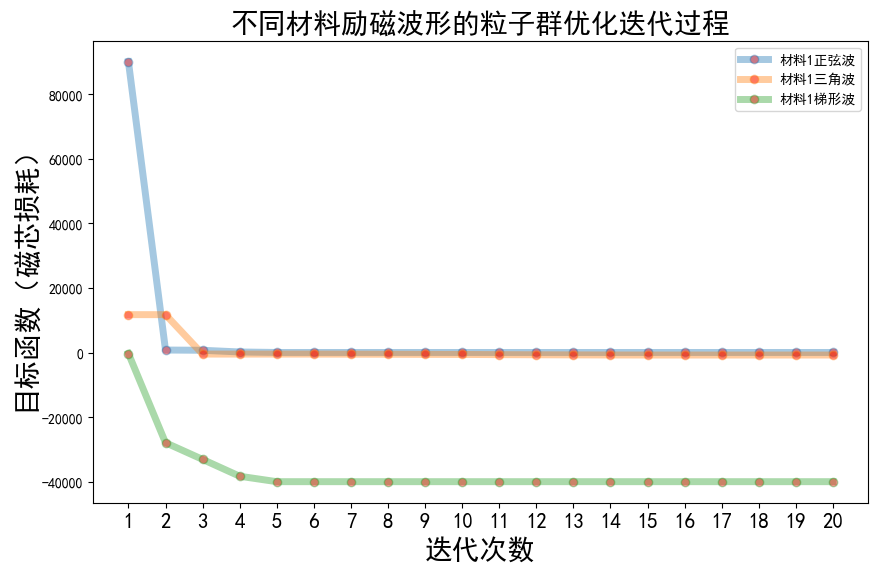

Iteration 1/20, Best Position: [4.17144375e+05 8.17337341e-02 6.75524095e+01], Best Score: 450285.102565257
Iteration 2/20, Best Position: [4.17077562e+05 9.63815000e-03 6.90239571e+01], Best Score: 2914.3714201108705
Iteration 3/20, Best Position: [4.21796165e+05 9.63815000e-03 7.88834073e+01], Best Score: 2827.033891625998
Iteration 4/20, Best Position: [4.3042254e+05 9.6381500e-03 9.0000000e+01], Best Score: 2785.077069557159
Iteration 5/20, Best Position: [4.23296919e+05 9.63815000e-03 8.90701736e+01], Best Score: 2725.7649661472124
Iteration 6/20, Best Position: [4.19593422e+05 9.63815000e-03 9.00000000e+01], Best Score: 2680.5948222880334
Iteration 7/20, Best Position: [4.09236981e+05 9.63815000e-03 8.99499691e+01], Best Score: 2582.403413989986
Iteration 8/20, Best Position: [3.96126604e+05 9.63815000e-03 9.00000000e+01], Best Score: 2458.7670746840986
Iteration 9/20, Best Position: [3.85081572e+05 9.63815000e-03 9.00000000e+01], Best Score: 2356.574348522494
Iteration 10/20, Be

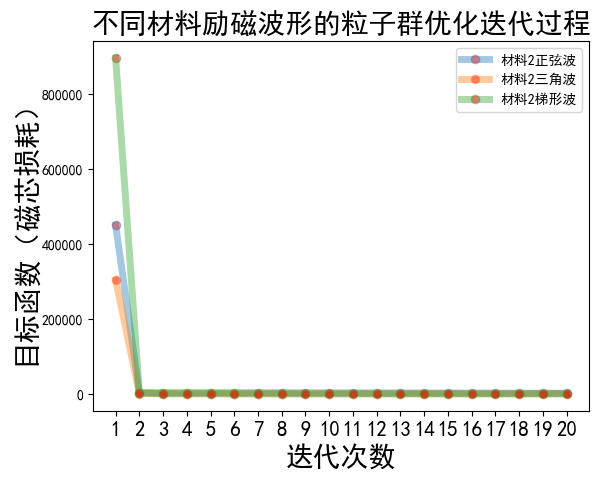

Iteration 1/20, Best Position: [4.24816011e+05 1.36815036e-02 8.73897092e+01], Best Score: 12777.114362515018
Iteration 2/20, Best Position: [4.27761556e+05 9.63815000e-03 9.00000000e+01], Best Score: 6043.253705350855
Iteration 3/20, Best Position: [3.99824714e+05 9.63815000e-03 8.15625190e+01], Best Score: 5576.998579866305
Iteration 4/20, Best Position: [3.06907665e+05 9.63815000e-03 5.83681622e+01], Best Score: 4068.3876246432205
Iteration 5/20, Best Position: [2.38017218e+05 9.63815000e-03 3.37388011e+01], Best Score: 3021.346933659016
Iteration 6/20, Best Position: [1.39396729e+05 9.63815000e-03 2.50000000e+01], Best Score: 1583.275316638545
Iteration 7/20, Best Position: [4.99900e+04 9.63815e-03 2.50000e+01], Best Score: 449.5202768728951
Iteration 8/20, Best Position: [4.99900e+04 9.63815e-03 2.50000e+01], Best Score: 449.5202768728951
Iteration 9/20, Best Position: [4.99900e+04 9.63815e-03 2.50000e+01], Best Score: 449.5202768728951
Iteration 10/20, Best Position: [4.99900e+04

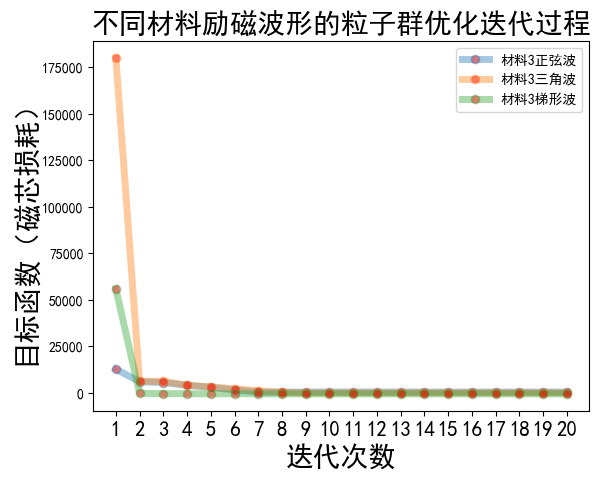

Iteration 1/20, Best Position: [2.45574723e+05 1.36248305e-01 7.06978712e+01], Best Score: 830981.4244394336
Iteration 2/20, Best Position: [1.86930744e+05 9.63815000e-03 6.65018783e+01], Best Score: 587.3973137057609
Iteration 3/20, Best Position: [1.24932291e+05 9.63815000e-03 8.61232792e+01], Best Score: 242.59920087536977
Iteration 4/20, Best Position: [4.99900000e+04 9.63815000e-03 5.06607588e+01], Best Score: 52.99440264798878
Iteration 5/20, Best Position: [4.99900000e+04 9.63815000e-03 6.93136635e+01], Best Score: 38.23256841502898
Iteration 6/20, Best Position: [4.99900000e+04 9.63815000e-03 7.63675728e+01], Best Score: 34.23883916643362
Iteration 7/20, Best Position: [4.999000e+04 9.638150e-03 8.280579e+01], Best Score: 31.081899452539915
Iteration 8/20, Best Position: [4.99900e+04 9.63815e-03 9.00000e+01], Best Score: 27.990084538958783
Iteration 9/20, Best Position: [4.99900e+04 9.63815e-03 9.00000e+01], Best Score: 27.990084538958783
Iteration 10/20, Best Position: [4.9990

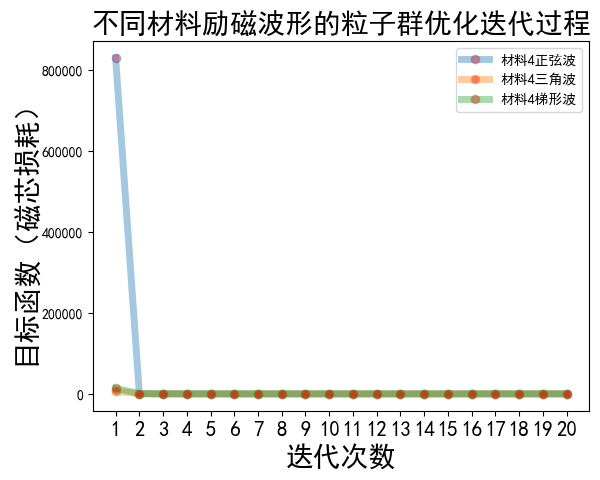

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
import numpy as np
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd
import warnings
import seaborn as sns
from scipy.stats import pearsonr
# 忽略所有的警告
warnings.filterwarnings("ignore")

# 设置字体为 SimHei（黑体）以支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False    # 解决负号


# 定义目标函数 
def objective_function(x):
    return a*steinmetz_eq_adjust(x) + b*separate(x)

# 粒子类
class Particle:
    def __init__(self, dimensions, bounds):
        self.position = np.random.uniform(bounds[:, 0], bounds[:, 1], dimensions)  # 粒子的位置
        self.velocity = np.random.uniform(-1, 1, dimensions)                      # 粒子的速度
        self.best_position = np.copy(self.position)                               # 粒子经历的最佳位置
        self.best_score = float('inf')                                            # 粒子经历的最佳得分
        self.bounds = bounds                                                     # 搜索空间边界

    # 更新位置并确保其在边界范围内
    def update_position(self):
        self.position = np.clip(self.position, self.bounds[:, 0], self.bounds[:, 1])

# 粒子群算法类
class PSO:
    def __init__(self, objective_function, dimensions, bounds, n_particles=30, max_iter=100, w=0.5, c1=1.5, c2=2.0):
        self.objective_function = objective_function  # 目标函数
        self.dimensions = dimensions                  # 搜索空间的维度
        self.bounds = bounds                          # 搜索空间的边界 (约束)
        self.n_particles = n_particles                # 粒子的数量
        self.max_iter = max_iter                      # 最大迭代次数
        self.w = w                                    # 惯性权重
        self.c1 = c1                                  # 个体学习因子
        self.c2 = c2                                  # 社会学习因子
        self.particles = [Particle(dimensions, bounds) for _ in range(n_particles)]  # 初始化粒子群
        self.global_best_position = np.zeros(dimensions)  # 全局最佳位置
        self.global_best_score = float('inf')             # 全局最佳得分

    # 优化过程
    def optimize(self):
        ls = []
        for t in range(self.max_iter):
            for particle in self.particles:
                # 计算当前粒子的目标函数值
                fitness = self.objective_function(particle.position)
                
                # 更新粒子的个体最佳位置和得分
                if fitness < particle.best_score:
                    particle.best_score = fitness
                    particle.best_position = np.copy(particle.position)

                # 更新全局最佳位置和得分
                if fitness < self.global_best_score:
                    self.global_best_score = fitness
                    self.global_best_position = np.copy(particle.position)

            # 更新粒子的速度和位置
            for particle in self.particles:
                r1 = np.random.random(self.dimensions)
                r2 = np.random.random(self.dimensions)

                # 速度更新公式
                particle.velocity = (self.w * particle.velocity +
                                    self.c1 * r1 * (particle.best_position - particle.position) +
                                    self.c2 * r2 * (self.global_best_position - particle.position))

                # 位置更新
                particle.position += particle.velocity
                particle.update_position()  # 更新后确保粒子位置在约束范围内

            # 输出当前迭代的全局最优解
            print(f"Iteration {t+1}/{self.max_iter}, Best Position: {self.global_best_position}, Best Score: {self.global_best_score}")
            ls.append(self.global_best_score)

        return self.global_best_position, self.global_best_score,pd.Series(ls)


# 定义问题的维度
dimensions = 3
# 定义每个维度的搜索空间边界（例如 [-5, 5]）
bounds = np.array([[49990, 501180], [0.00963815,0.313284469], [25, 90]])


ls = []
score = []
mat = []
bo = []

plt.figure(figsize=(10, 6))

for i in df['材料'].unique():
    for o in df['励磁波形'].unique():
        a1,a2,a3,a4,b1,b2,b3,b4,a,b = df[(df.材料==i)&(df.励磁波形==o)][['a1', 'a2', 'a3', 'a4', 'b1', 'b2', 'b3', 'b4','a','b']].values[0]
        pso = PSO(objective_function, dimensions, bounds, n_particles=5, max_iter=20)
        best_position, best_score,values = pso.optimize()
        
        values.plot(linestyle='-',marker='o',markerfacecolor='r',alpha=0.4,linewidth=5,label=f'{i}{o}')
        
        ls.append(best_position)
        score.append(best_score)
        mat.append(i)
        bo.append(o)
        
        
    plt.title('不同材料励磁波形的粒子群优化迭代过程',fontsize=20)
    plt.xlabel('迭代次数',fontsize=20)
    plt.ylabel('目标函数（磁芯损耗）',fontsize=20)
    plt.legend()
    plt.xticks(list(range(20)),list(range(1,21)),rotation=0,fontsize=15)
    #plt.savefig(f'问题5\\{i}励磁波形的粒子群优化迭代过程.png',dpi=500)
    plt.show()
result = pd.DataFrame(ls,columns=['f_opt','Bm_opt','temp_opt'])
result['材料'] = mat
result['励磁波形'] = bo
result['最优磁芯损耗'] = score
result.to_excel('最优磁芯损耗.xlsx',index=False)